# Procrastinate Pro+ Marketing Analysis

Procrastinate Pro+, an entertainment app, has been facing financial losses despite heavy investments in advertising. This project aims to identify the causes of these losses and recommend strategies for improvement.

## 1. Introduction

### Objectives:
- Analyze user behavior, device preferences, and traffic sources.
- Evaluate the cost-effectiveness of marketing campaigns by calculating metrics like CAC, LTV, and ROI.
- Investigate user retention and conversion rates to assess advertising performance.
- Identify channels, devices, or regions that negatively impact profitability.

### Data Sources:
1. **Visits Data**: Logs of user sessions on the platform.
2. **Orders Data**: Records of user purchases and revenues.
3. **Advertising Costs**: Information on expenses by channel.

### Methodology:
- Data preparation and preprocessing.
- Exploratory data analysis (EDA) to understand user acquisition and retention patterns.
- Metric calculation and visualization to evaluate campaign performance.
- Recommendations for improving the efficiency of marketing efforts.




In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np

In [2]:
if os.path.exists('visits_info_short.csv'):
    visits = pd.read_csv('visits_info_short.csv')
    print("Visits data successfully loaded locally.")
else:
    visits = pd.read_csv('https://raw.githubusercontent.com/bronetazik99/Practicum_projects/refs/heads/main/Project4/visits_info_short.csv')
    print("Local Visits data not available. Data loaded from the web.")

if os.path.exists('orders_info_short.csv'):
    orders = pd.read_csv('orders_info_short.csv')
    print("Orders data successfully loaded locally.")
else:
    orders = pd.read_csv('https://raw.githubusercontent.com/bronetazik99/Practicum_projects/refs/heads/main/Project4/orders_info_short.csv')
    print("Local Orders data not available. Data loaded from the web.")

if os.path.exists('costs_info_short.csv'):
    costs = pd.read_csv('costs_info_short.csv')
    print("Costs data successfully loaded locally.")
else:
    costs = pd.read_csv('https://raw.githubusercontent.com/bronetazik99/Practicum_projects/refs/heads/main/Project4/costs_info_short.csv')
    print("Local Costs data not available. Data loaded from the web.")

Visits data successfully loaded locally.
Orders data successfully loaded locally.
Costs data successfully loaded locally.


In [3]:
display(visits.head())
display(orders.head())
display(costs.head())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [4]:
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

---

## 2. Data Preparation

### 2.1 Renaming columns

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [6]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [7]:
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [8]:
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

### 2.2 Changing data types

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### 2.3 Handling duplicates

In [10]:
def check_and_remove_duplicates(df, remove=False):
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        print(f"{duplicate_count} duplicate rows found in the DataFrame.")
        if remove:
            df = df.drop_duplicates()
            print("Duplicate rows have been removed.")
    else:
        print("No duplicate rows found in the DataFrame.")

In [11]:
check_and_remove_duplicates(visits)

No duplicate rows found in the DataFrame.


In [12]:
check_and_remove_duplicates(orders)

No duplicate rows found in the DataFrame.


In [13]:
check_and_remove_duplicates(costs)

No duplicate rows found in the DataFrame.


### 2.4 Handling missing values

In [14]:
def isna_check(df):
    for column in df.columns:
        missing_count = df[column].isna().sum()
        if missing_count > 0:
            print(f"The column '{column}' has {missing_count} missing values.")
        else:
            print(f"The column '{column}' has no missing values.")

In [15]:
isna_check(visits)

The column 'user_id' has no missing values.
The column 'region' has no missing values.
The column 'device' has no missing values.
The column 'channel' has no missing values.
The column 'session_start' has no missing values.
The column 'session_end' has no missing values.


In [16]:
isna_check(orders)

The column 'user_id' has no missing values.
The column 'event_dt' has no missing values.
The column 'revenue' has no missing values.


In [17]:
isna_check(costs)

The column 'dt' has no missing values.
The column 'channel' has no missing values.
The column 'costs' has no missing values.


### 2.5 Checking Data for Unique Values

#### 2.5.1 DataFrame `visits`

Column `region`:

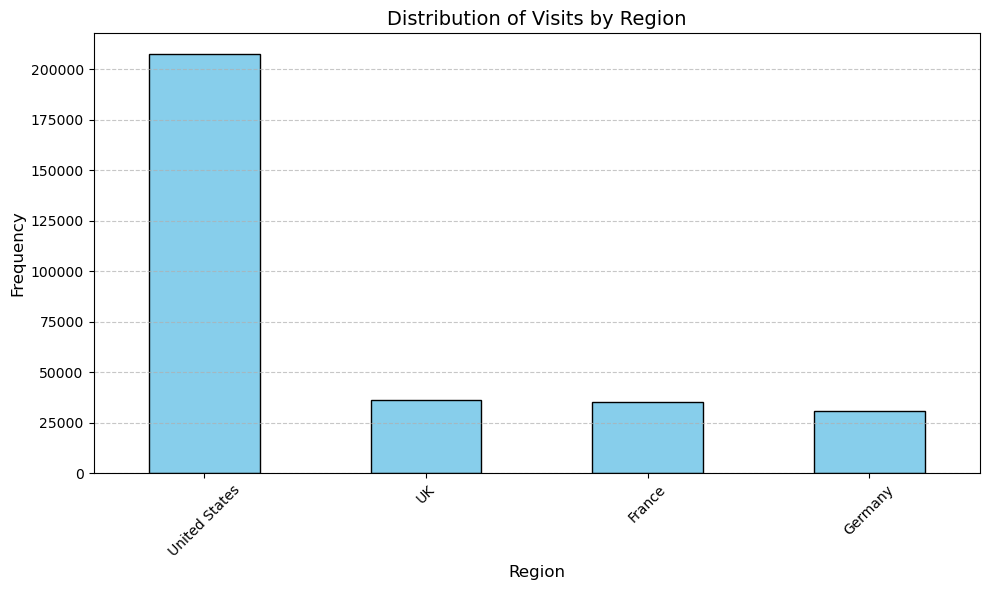

In [18]:
plt.figure(figsize=(10, 6))
visits['region'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Region', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Visits by Region', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Column `device`:

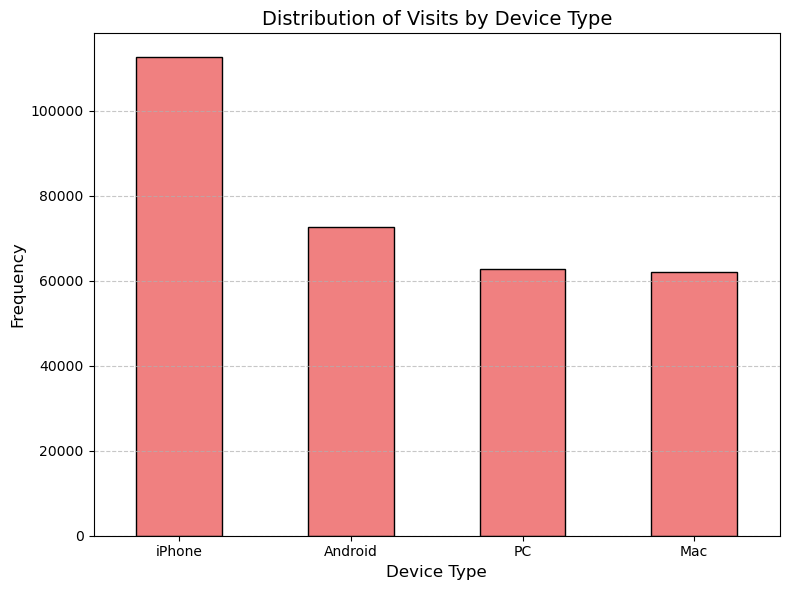

In [19]:
plt.figure(figsize=(8, 6))
visits['device'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')

plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Visits by Device Type', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Column `channel`:

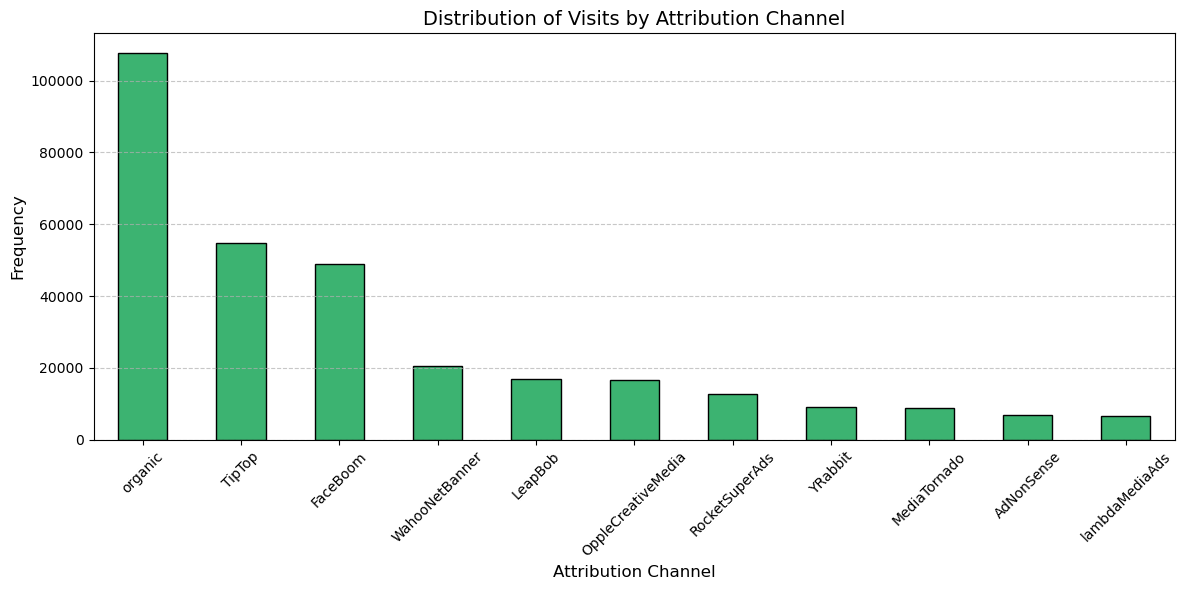

In [20]:
plt.figure(figsize=(12, 6))
visits['channel'].value_counts().plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Attribution Channel', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Visits by Attribution Channel', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

DIstribution of session duration (`session_start` and `session_end`):

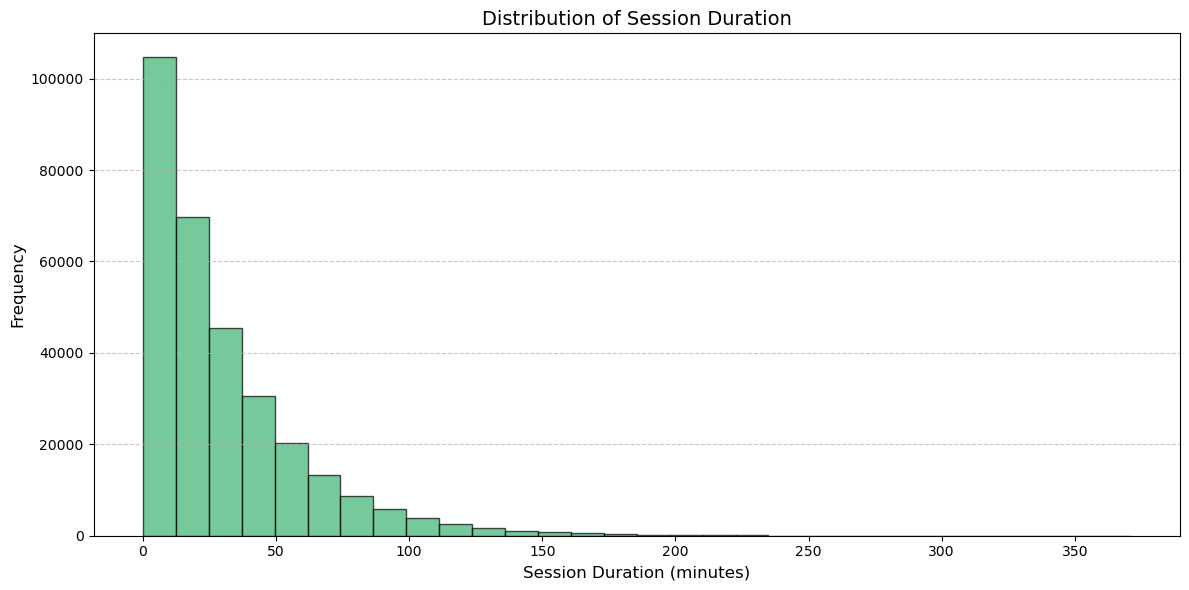

In [21]:
# Calculate session duration in minutes
visits['session_duration'] = (visits['session_end'] - visits['session_start']).dt.total_seconds() / 60

plt.figure(figsize=(12, 6))
plt.hist(visits['session_duration'], bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)

plt.xlabel('Session Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Session Duration', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2.5.2 DataFrame `orders`

Column `revenue`:

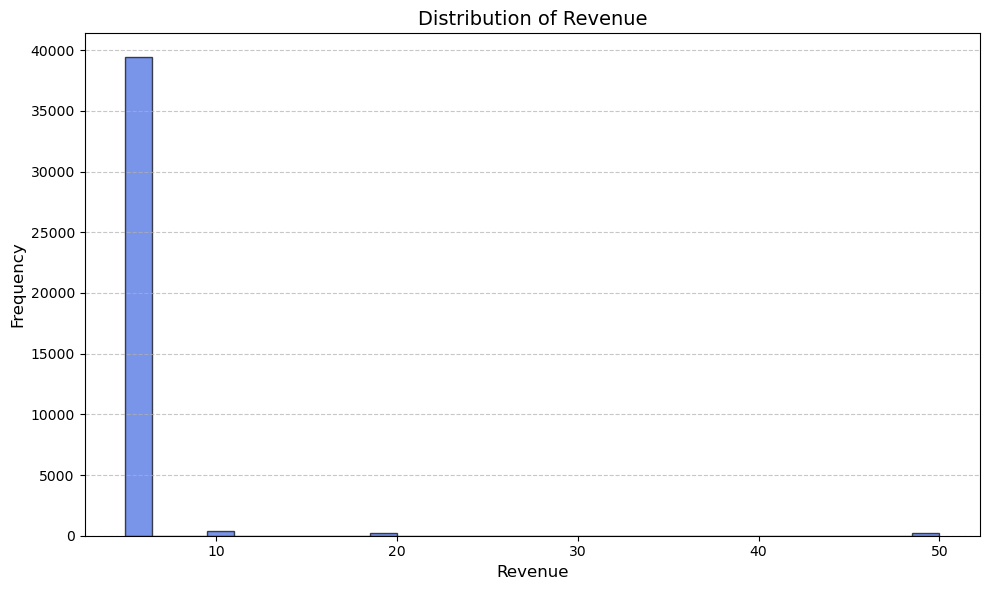

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(orders['revenue'], bins=30, color='royalblue', edgecolor='black', alpha=0.7)

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Revenue', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2.5.3 DataFrame `costs`

Column `channel`:

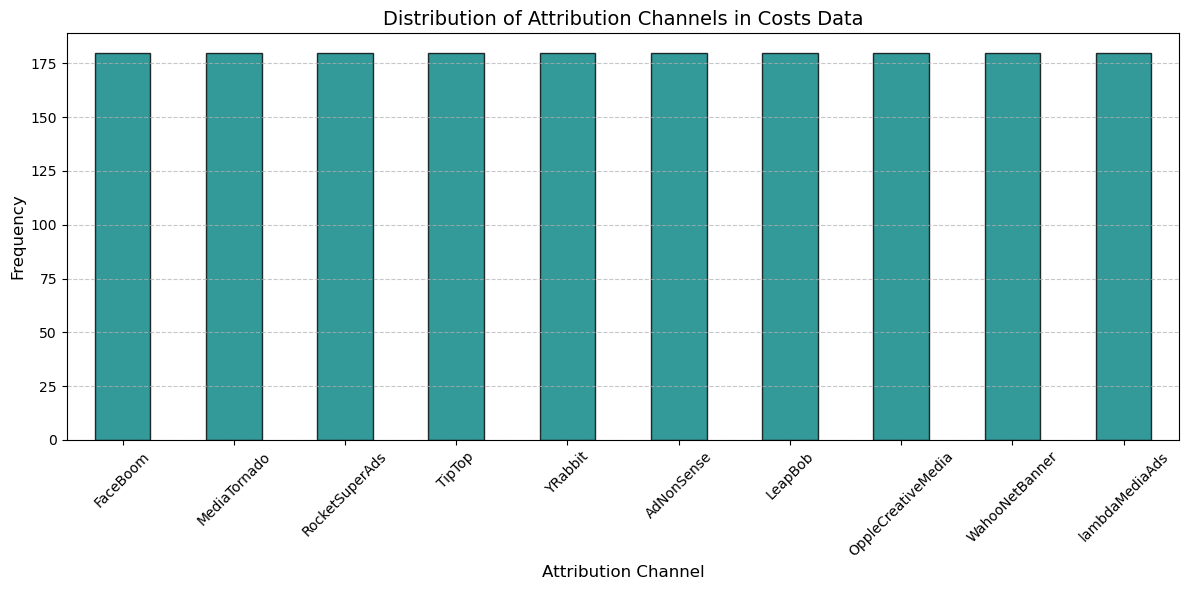

In [23]:
# Plot bar chart for channel distribution
plt.figure(figsize=(12, 6))
costs['channel'].value_counts().plot(kind='bar', color='teal', edgecolor='black', alpha=0.8)

plt.xlabel('Attribution Channel', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Attribution Channels in Costs Data', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Column `costs`:

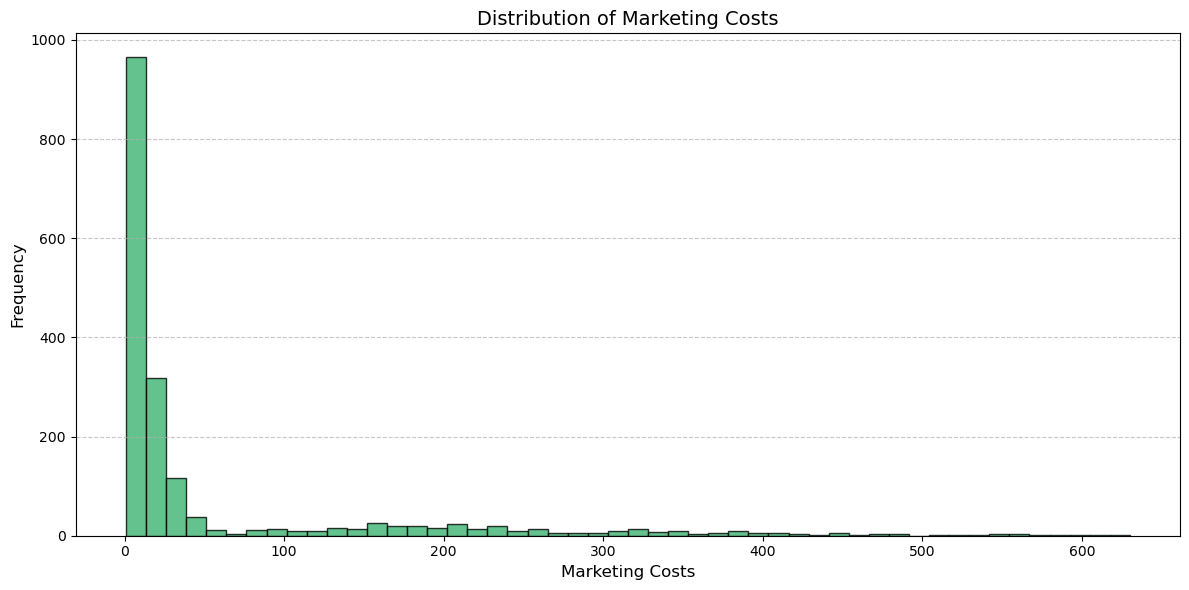

In [24]:
# Plot histogram for costs
plt.figure(figsize=(12, 6))
plt.hist(costs['costs'], bins=50, color='mediumseagreen', edgecolor='black', alpha=0.8)

plt.xlabel('Marketing Costs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Marketing Costs', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Skewed Distribution:** The majority of marketing costs are concentrated in the lower ranges (close to 0–100), with fewer occurrences as the costs increase.

**Outliers:** A few higher marketing cost values can be seen in the range of 200–600, suggesting some campaigns had significantly higher spending.

---

## 3. Defining Functions for Calculating and Analyzing LTV, ROI, Retention, and Conversion

### 3.1 Function to create user profiles

In [25]:
# Function to create user profiles

def get_profiles(sessions, orders, ad_costs):

    # Identify parameters of first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # For cohort analysis, define the date of the first visit
    # and the first day of the month when the visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # Add a feature for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Count the number of unique users
    # with the same acquisition source and date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Merge ad costs with the number of acquired users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Calculate advertising costs per acquired user
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Add acquisition cost to user profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # The acquisition cost for organic users is set to zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### 3.2 Function to calculate retention

In [26]:
# Function to calculate retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Add the 'payer' column to the dimensions list
    dimensions = ['payer'] + dimensions

    # Exclude users who did not reach the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Collect raw data for calculating retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Get the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return both tables and raw data
    return result_raw, result_grouped, result_in_time

### 3.3 Function to calculate conversion

In [27]:
# Function to calculate conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Exclude users who did not reach the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Add purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Group by cohort if no dimensions are provided
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # Function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Divide each cell in the row by the cohort size to get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # For the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # Get the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return both tables and raw data
    return result_raw, result_grouped, result_in_time

### 3.4 Function to calculate LTV and ROI

In [28]:
# Function to calculate LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Exclude users who did not reach the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # Add purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # Calculate user lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Group by cohort if no dimensions are provided
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Function to group by desired features
    def group_by_dimensions(df, dims, horizon_days):
        # Create a triangular table of revenue
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Accumulate revenue over time
        result = result.fillna(0).cumsum(axis=1)

        # Calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Merge cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Calculate LTV: divide each cell in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)

        # Exclude lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]

        # Restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # Collect user data with CAC values and parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculate average CAC by dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # Remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # Add CAC to the ROI table
        roi['cac'] = cac['cac']

        # Keep cohort sizes, CAC, and ROI for lifetimes within the horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Return LTV and ROI tables
        return result, roi

    # Get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # For dynamic tables, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # Get dynamic LTV and ROI tables
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # Raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

### 3.5 Function to smooth the DataFrame

In [29]:
# Function to smooth the DataFrame

def filter_data(df, window):
    # Apply a moving average to each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### 3.6 Function to visualize retention

In [30]:
# Function to visualize retention

def plot_retention(retention, retention_history, horizon, window=7):

    # Set the figure size for the plots
    plt.figure(figsize=(15, 10))

    # Exclude cohort sizes and first-day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # Retain only the required lifetime in the dynamics table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # If the retention table index only has 'payer', add a second feature — 'cohort'
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # Create a 2x2 grid for the plots
    # First cell: retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')

    # Second cell: retention curves for non-paying users
    # Share the y-axis with the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-Paying Users')

    # Third cell: retention dynamics for paying users
    ax3 = plt.subplot(2, 2, 3)
    # Get column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Filter data and plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Retention Dynamics of Paying Users on Day {}'.format(horizon)
    )

    # Fourth cell: retention dynamics for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Filter data and plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Retention Dynamics of Non-Paying Users on Day {}'.format(horizon)
    )
    
    plt.tight_layout()
    plt.show()

### 3.7 # Function to visualize conversion

In [31]:
# Function for visualizing conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # Set the figure size for the plots
    plt.figure(figsize=(15, 5))

    # Exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # In the dynamics table, retain only the required lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # First plot: Conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion Rates')

    # Second plot: Conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # Pivot table columns will include all index columns except the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('User Conversion Dynamics on Day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

### 3.8 Function to visualize LTV and ROI

In [32]:
# Function to visualize LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # Set the figure layout for the plots
    plt.figure(figsize=(20, 10))

    # Exclude cohort sizes from the LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # Retain only the relevant lifetime in the LTV dynamics table
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Extract CAC (Customer Acquisition Cost) into a separate DataFrame
    cac_history = roi_history[['cac']]

    # Exclude cohort sizes and CAC from the ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # Retain only the relevant lifetime in the ROI dynamics table
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # First plot: LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # Second plot: LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # Pivot table columns will include all index columns except the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('User LTV Dynamics on Day {}'.format(horizon))

    # Third plot: CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # Pivot table columns will include all index columns except the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('User Acquisition Cost Dynamics')

    # Fourth plot: ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # Fifth plot: ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # Pivot table columns will include all index columns except the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Level')
    plt.xlabel('Acquisition Date')
    plt.title('User ROI Dynamics on Day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

---

## 4. Exploratory Data Analysis (EDA)

**Plan**:
1. Create user profiles and determine the minimum and maximum dates of user acquisition.  
2. Identify the countries from which users access the application and find the country with the highest number of paying users. Build a table showing the number of users and the share of paying users for each country.  
3. Analyze the devices used by clients and identify the devices preferred by paying users. Build a table showing the number of users and the share of paying users for each device.  
4. Study the advertising sources of acquisition and determine the channels that bring the highest number of paying users. Build a table showing the number of users and the share of paying users for each acquisition channel.


### 4.1 Create User Profiles

In [33]:
profiles = get_profiles(visits, orders, costs)

In [34]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Determine the Minimum and Maximum User Acquisition Dates:

In [35]:
first_date = profiles['dt'].min()
last_date = profiles['dt'].max()

print("First date:", first_date)
print("Last date:", last_date)

First date: 2019-05-01
Last date: 2019-10-27


The user acquisition period spans from May 1, 2019, to October 27, 2019, which aligns with the project requirements (Terms of Reference).

### 4.2 Analyze User Countries
**Identify the countries from which users access the application and determine which country has the highest number of paying users**

In [36]:
country_data = profiles.groupby('region').agg(
    total_users=('user_id', 'nunique'),
    paying_users=('payer', 'sum')).sort_values(by='paying_users', ascending=False)

country_data['paying_user_ratio'] = country_data['paying_users'] / country_data['total_users']

country_data.style.format({'paying_user_ratio': '{:.2%}'})

- **United States**: The largest number of users (100,002) and paying users (6,902), with a paying user share of 6.9%, the highest among all countries.
- **Germany**: The highest paying user share (4.11%) among European countries, but fewer total users and paying users compared other states.
- **France and United Kingdom**: Similar metrics for total users and paying user share, with approximately 4% of users being paying customers.

### 4.3 Analyze User Devices
**Identify the devices used by clients and determine which devices are preferred by paying users.**

In [37]:
device_data = profiles.groupby('device').agg(
    total_users=('user_id', 'nunique'),
    paying_users=('payer', 'sum')).sort_values(by='paying_users', ascending=False)

device_data['paying_user_ratio'] = device_data['paying_users'] / device_data['total_users']

device_data.style.format({'paying_user_ratio': '{:.2%}'})

- **iPhone**: The most used device (54,479 users) with a paying user ratio of 6.21%.  
- **Mac**: The smallest user base (30,042 users) but the highest paying user ratio (6.36%).  
- **Android**: Second-largest user base (35,032 users) with a paying user ratio of 5.85%.  
- **PC**: Moderate user base (30,455 users) with the smallest paying user ratio of 5.05%.  

### 4.4 Analyze Advertising Channels
**Study the advertising sources of user acquisition and identify the channels that bring the highest number of paying users.**

In [38]:
channel_data = profiles.groupby('channel').agg(
    total_users=('user_id', 'nunique'),
    paying_users=('payer', 'sum')).sort_values(by='paying_users', ascending=False)

channel_data['paying_user_ratio'] = channel_data['paying_users'] / channel_data['total_users']

channel_data.style.format({'paying_user_ratio': '{:.2%}'})

- **FaceBoom**: Leading channel with 3,557 paying users and a high paying user share (12.20%).  
- **TipTop**: Second in paying users (1,878) with a significant paying user share (9.60%).  
- **Organic Users**: The largest user base (56,439 users) but the lowest paying user share (2.06%).  
- **AdNonSense and lambdaMediaAds**: High paying user shares (11.34% and 10.47%, respectively) despite smaller total user bases.  

### 4.5 Summary of User Activity Analysis

This section provides a detailed analysis of user activity, highlighting key metrics:

- **Market Focus**: Special attention should be given to the U.S. market, which has the largest user base and a high conversion rate.  

- **Device Trends**: Mobile users dominate, emphasizing the importance of optimizing the mobile experience. Apple users, in particular, show significantly higher conversion rates.  

- **Advertising Channels**: While most users arrive organically, some paid channels demonstrate excellent conversion rates despite smaller user bases. Marketing campaigns based on these insights should be further analyzed and optimized.  


---

## 5. Marketing

**Plan:**

- **Total Marketing Spend**: Calculate the overall amount spent on marketing campaigns.  
- **Spending by Channel**: Determine how expenses are distributed across advertising channels and how much was spent on each channel.  
- **Weekly Trends**: Visualize the weekly dynamics of marketing expenses for each channel.  
- **Monthly Trends**: Visualize the monthly dynamics of marketing expenses for each channel.  
- **Cost per Acquisition (CAC)**: Calculate the average cost of acquiring one user (CAC) for each channel using user profiles.  

### 5.1 Total Marketing Spend
**Calculate the overall sum of expenses on marketing campaigns to understand the total investment made in user acquisition.**

In [39]:
total_marketing_costs = costs['costs'].sum()
print("Total Marketing Costs:", total_marketing_costs.round(2))

Total Marketing Costs: 105497.3


The total marketing expenses for the analyzed period amount to **105,497.30**.  

That represents all costs associated with advertising campaigns and user acquisition across various marketing channels. These expense data will aid in evaluating the effectiveness of marketing strategies and in planning future budget allocations.

### 5.2 Distribution of Marketing Expenses by Channel
**Analyze how marketing expenses are allocated across different advertising channels to identify spending patterns and prioritize future investments.**


In [40]:
channel_costs = costs.groupby('channel').agg(total_costs=('costs', 'sum')).reset_index()
channel_costs['costs_ratio'] = channel_costs['total_costs'] / total_marketing_costs

channel_costs.style.format({'costs_ratio': '{:.2%}'})

- **TipTop**: The most expensive channel, accounting for 51.90% of total marketing expenses.  
- **FaceBoom**: Second in spending, with 30.75% of total costs.  
- **WahooNetBanner and AdNonSense**: The least expensive channels, each representing 4-5% of total expenses.  

### 5.3 Visualizing Marketing Expense Trends Over Time
Create visualizations to analyze the dynamics of marketing expenses over time:
- **Weekly Trends**: Display weekly changes in expenses for each advertising channel.
- **Monthly Trends**: Show monthly expense patterns across all channels.

In [41]:
costs['dt'] = pd.to_datetime(costs['dt'])

# Create columns for week and month
costs['week'] = costs['dt'].dt.to_period('W').apply(lambda r: r.start_time)
costs['month'] = costs['dt'].dt.to_period('M').apply(lambda r: r.start_time)

In [42]:
# Grouping data by weeks and channels
weekly_costs = costs.groupby(['week', 'channel']).agg(total_costs=('costs', 'sum')).reset_index()

# Grouping data by months and channels
monthly_costs = costs.groupby(['month', 'channel']).agg(total_costs=('costs', 'sum')).reset_index()

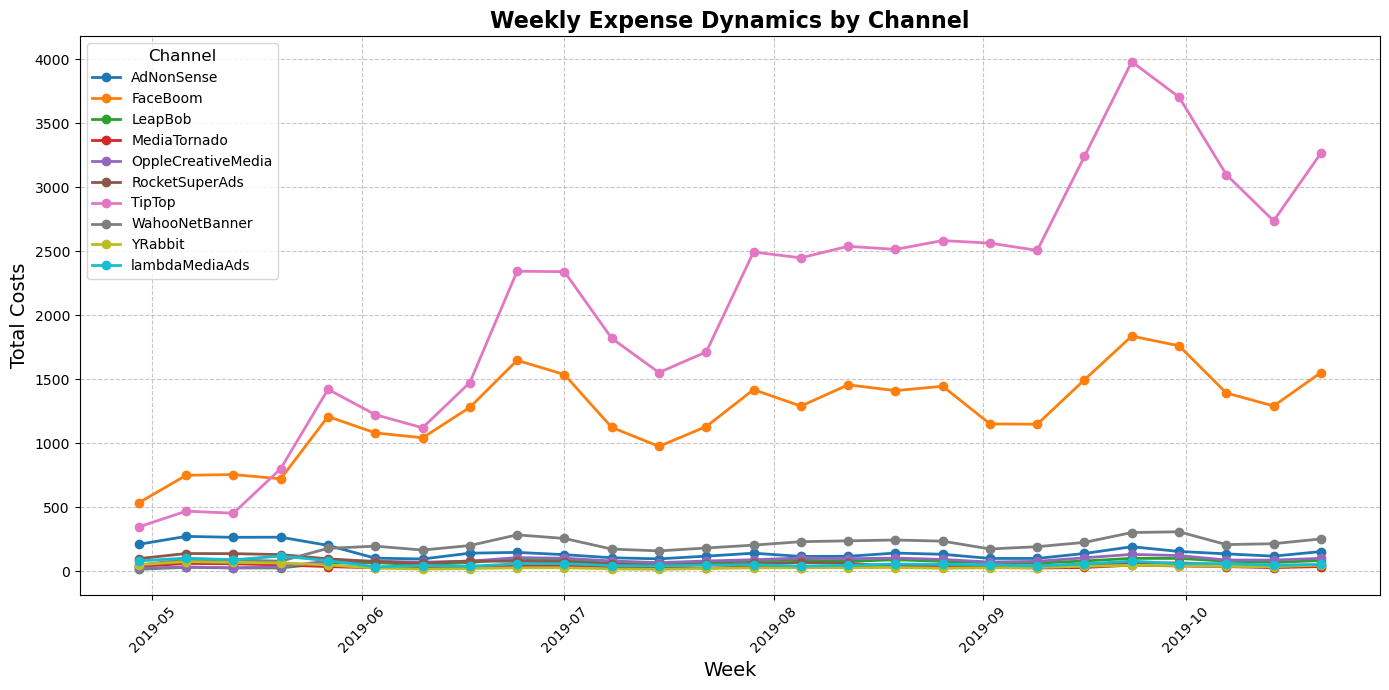

In [45]:
# Plotting the weekly expense dynamics
plt.figure(figsize=(14, 7))

for channel in weekly_costs['channel'].unique():
    data = weekly_costs[weekly_costs['channel'] == channel]
    plt.plot(
        data['week'], 
        data['total_costs'], 
        label=channel, 
        marker='o',  # Add markers for data points
        linewidth=2   # Increase line width for better visibility
    )

# Enhancing the plot
plt.title('Weekly Expense Dynamics by Channel', fontsize=16, fontweight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total Costs', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Channel', fontsize=10, title_fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)  # Use dashed gridlines for subtle emphasis
plt.tight_layout()  # Adjust layout to fit all elements cleanly

plt.show()

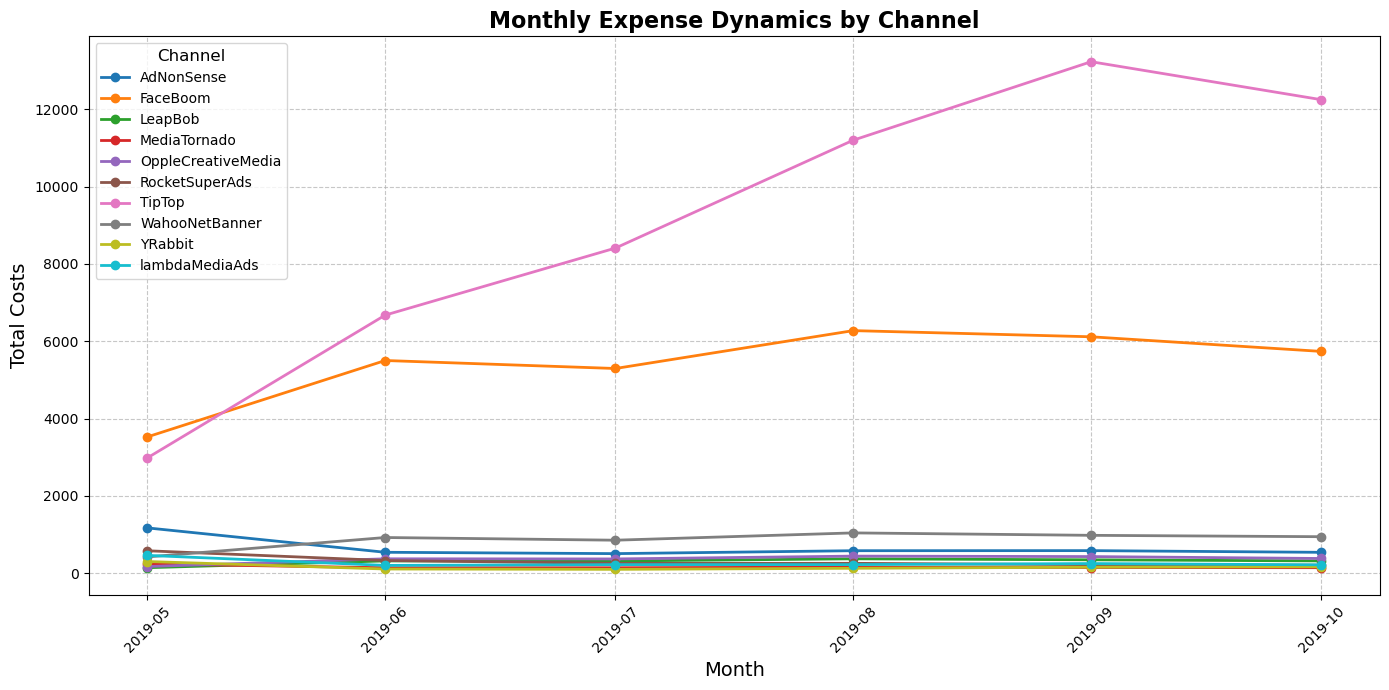

In [46]:
# Plotting the monthly expense dynamics
plt.figure(figsize=(14, 7))

for channel in monthly_costs['channel'].unique():
    data = monthly_costs[monthly_costs['channel'] == channel]
    plt.plot(
        data['month'], 
        data['total_costs'], 
        label=channel, 
        marker='o',  # Add markers for better visibility
        linewidth=2   # Increase line width for clarity
    )

# Enhancing the plot
plt.title('Monthly Expense Dynamics by Channel', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Costs', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Channel', fontsize=10, title_fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)  # Use dashed gridlines for subtle emphasis
plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

- **TipTop and FaceBoom**: The primary marketing expense channels, with significant spending and noticeable fluctuations on both a weekly and monthly basis.  
- **AdNonSense and WahooNetBanner**: Secondary channels with moderate expenses, demonstrating stability over time.  
- **Least Expensive Channels**: Show nearly unchanged spending throughout the period, indicating a more controlled and potentially less impactful marketing budget for these sources.  

### 5.4 Calculate Cost per Acquisition (CAC) by Channel
**Determine the average cost of acquiring one user (CAC) for each advertising channel using user profiles. This metric helps evaluate the efficiency of spending across different channels.**


In [47]:
# Grouping profile data by channel and counting the number of users
user_counts = profiles.groupby('channel').agg(total_users=('user_id', 'nunique')).reset_index()

# Grouping cost data by channel
channel_costs = costs.groupby('channel').agg(total_costs=('costs', 'sum')).reset_index()

# Merging profile data with channel cost data
cac_data = channel_costs.merge(user_counts, on='channel', how='right')

In [48]:
cac_data

channel  total_costs  total_users
0           AdNonSense      3911.25         3880
1             FaceBoom     32445.60        29144
2              LeapBob      1797.60         8553
3         MediaTornado       954.48         4364
4   OppleCreativeMedia      2151.25         8605
5       RocketSuperAds      1833.00         4448
6               TipTop     54751.30        19561
7       WahooNetBanner      5151.00         8553
8              YRabbit       944.22         4312
9       lambdaMediaAds      1557.60         2149
10             organic          NaN        56439

Ensure that all data was merged without losses by comparing the merged table with the original profile and cost tables.

In [49]:
print(cac_data['total_costs'].sum())
print(channel_costs['total_costs'].sum())

105497.30000000002
105497.30000000002


In [50]:
print(cac_data['total_users'].sum())
print(channel_data['total_users'].sum())

150008
150008


Everything is alright!

Since the data integrity is confirmed, calculate the **Cost per Acquisition (CAC)** for each channel by dividing total costs by the total number of users.

In [51]:
cac_data['cac'] = cac_data['total_costs'] / cac_data['total_users']
cac_data.sort_values(by='cac')

channel  total_costs  total_users       cac
2              LeapBob      1797.60         8553  0.210172
3         MediaTornado       954.48         4364  0.218717
8              YRabbit       944.22         4312  0.218975
4   OppleCreativeMedia      2151.25         8605  0.250000
5       RocketSuperAds      1833.00         4448  0.412095
7       WahooNetBanner      5151.00         8553  0.602245
9       lambdaMediaAds      1557.60         2149  0.724802
0           AdNonSense      3911.25         3880  1.008054
1             FaceBoom     32445.60        29144  1.113286
6               TipTop     54751.30        19561  2.799003
10             organic          NaN        56439       NaN

Compute the overall average Cost per Acquisition (CAC) to understand which channels consume the most financial resources relative to user acquisition.

In [52]:
cac_data['cac'].mean().round(2)

0.76


- **Effective Channels**: LeapBob, MediaTornado, and YRabbit exhibit the lowest CAC, highlighting high cost-efficiency in user acquisition.  
- **Less Effective Channels**: TipTop and FaceBoom show high CAC, indicating a potential need for cost optimization or strategy adjustments.  
- **Moderate Channels**: OppleCreativeMedia and RocketSuperAds have balanced CAC values, reflecting moderate cost efficiency.  


### 5.5 Overall Conclusions

1. **Primary Expenses**: Marketing spending is heavily concentrated on TipTop and FaceBoom, dominating both total expenses and weekly/monthly trends.
2. **Cost Efficiency**: LeapBob, MediaTornado, and YRabbit are the most cost-efficient channels, with the lowest CAC.
3. **Need for Optimization**: TipTop and FaceBoom, despite high spending, have high CAC, signaling the need for strategy optimization.
4. **Expense Stability**: Secondary channels exhibit stable spending, aiding in budgeting and forecasting efforts.


---

## 6. Assess Advertising ROI

**Plan:**
Using LTV, ROI, and CAC charts, analyze the profitability of advertising efforts. Assume the current date is November 1, 2019, with a business plan goal that users must break even no later than two weeks after acquisition. Determine whether to include organic users in the analysis.

**Steps:**
1. **Analyze Overall ROI**:
   - Use LTV and ROI charts to evaluate overall advertising performance.
   - Include dynamics of LTV, CAC, and ROI over time.

2. **Conversion and Retention**:
   - Assess user conversion rates and their changes over time.
   - Analyze retention rates and their trends. Plot and review conversion and retention graphs.

3. **Device-Based ROI**:
   - Analyze profitability by device type.
   - Plot LTV and ROI charts, including the dynamics of LTV, CAC, and ROI.

4. **Country-Based ROI**:
   - Evaluate ROI by country.
   - Plot LTV and ROI charts and their dynamics for different countries.

5. **Channel-Based ROI**:
   - Assess ROI by advertising channel.
   - Plot LTV and ROI charts, along with the dynamics of LTV, CAC, and ROI for each channel.


In [55]:
# Exclude organic users
profiles_without_organics = profiles[(profiles['channel'] != 'organic')]

# Confirm the exclusion
print(f"Number of users after excluding organics: {profiles_without_organics['user_id'].nunique()}")

Number of users after excluding organics: 93569


### 6.1 Analyze Advertising ROI Using LTV and ROI Charts

In [56]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Calculate **LTV** and **ROI**:

In [57]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles_without_organics, orders, observation_date, horizon_days
)

Build plots:

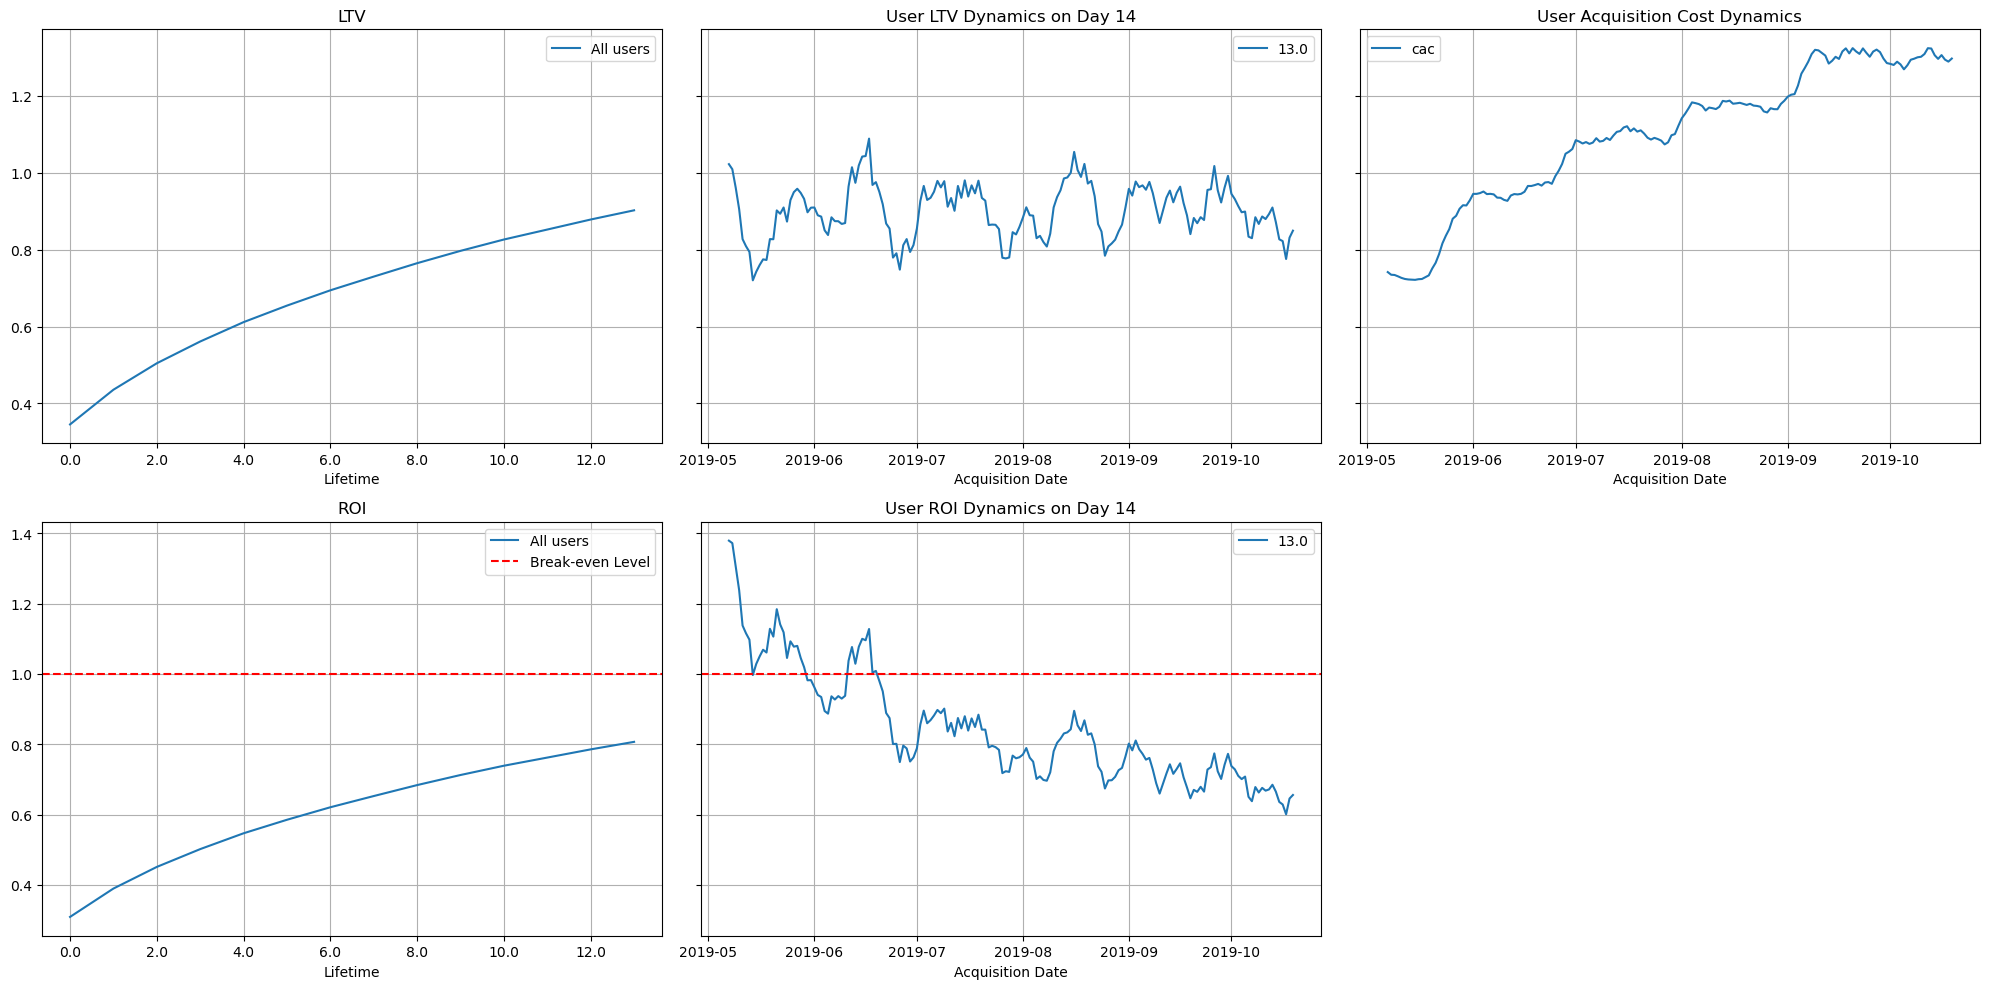

In [58]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- **User Profitability Growth**: Users gradually generate revenue over their lifecycle (LTV chart), but their cumulative profitability remains below 1.  
- **Seasonal Fluctuations and Traffic Quality**: LTV dynamics on the 14th day show fluctuations, likely reflecting seasonal changes or variations in traffic quality.  
- **Increased Acquisition Costs**: CAC chart highlights a significant rise in acquisition costs early in the period, followed by stabilization.  
- **Investment Non-Return**: ROI chart shows that investments fail to break even, as ROI remains below 1.0, signaling the need for strategic adjustments and cost reduction.  

We observe that ROI dynamics over the lifetime decline. While LTV dynamics remain relatively stable, CAC increases significantly from May to late October. This trend is reflected in ROI dynamics, where a sharp increase in CAC leads to an equivalent decline in user ROI dynamics.

### 6.2 Analyze User Retention and its Dynamics

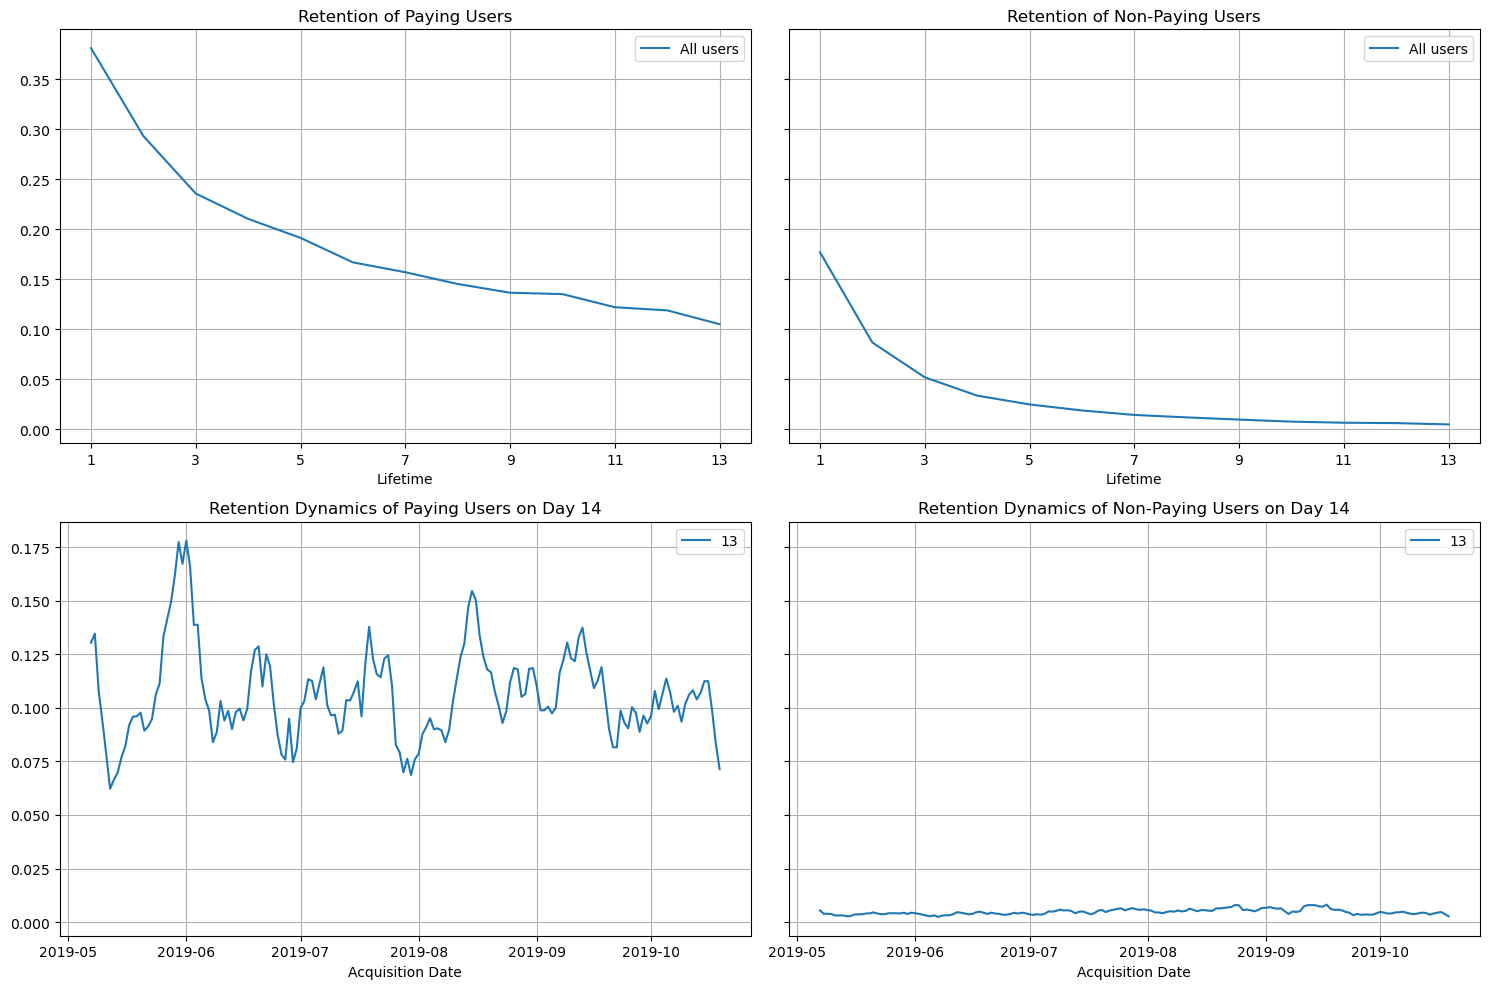

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organics, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

1. **Paying Users**:
   - Retention rates decline steadily over the user lifetime.
   - Dynamics on the 14th day show fluctuations, which may be influenced by seasonal changes or variations in traffic quality.

2. **Non-Paying Users**:
   - Retention rates drop sharply and remain low throughout the lifetime.
   - Dynamics on the 14th day are minimal, indicating very limited engagement among non-paying users.

3. **Overall Observations**:
   - Paying users show better retention compared to non-paying users but still experience significant declines over time.
   - Non-paying users exhibit extremely low retention, requiring stronger engagement strategies to sustain their interest.


Let's conduct Additional Retention Analysis Based on **Region**, **Device Type**, and **Acquisition Channel**

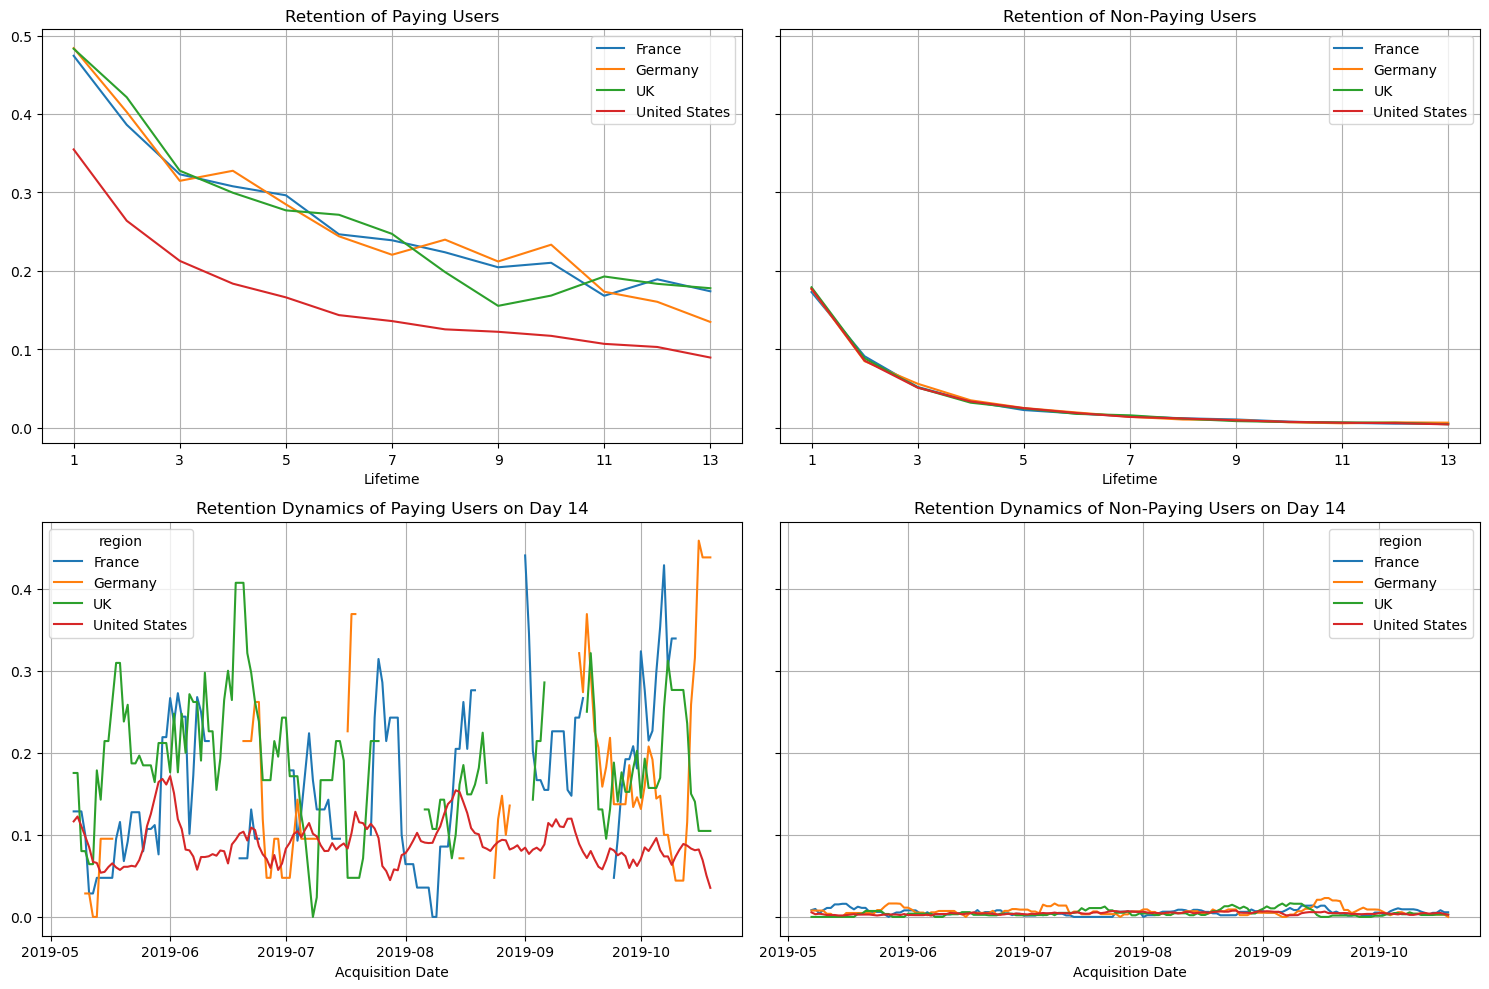

In [63]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organics, visits, observation_date, horizon_days, ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

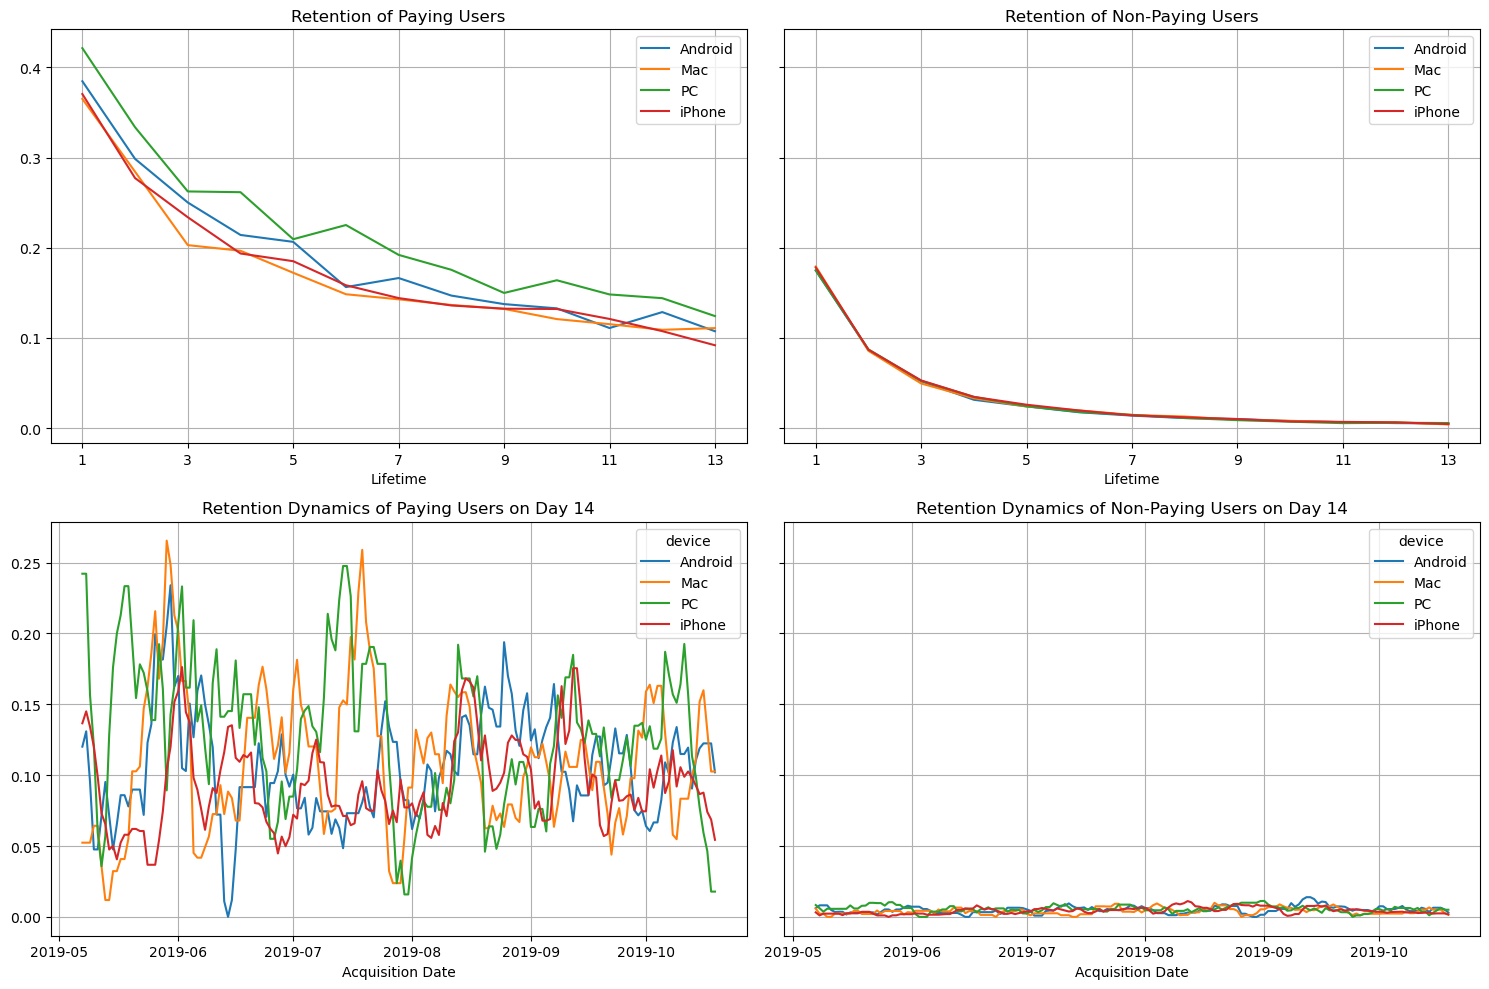

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organics, visits, observation_date, horizon_days, ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

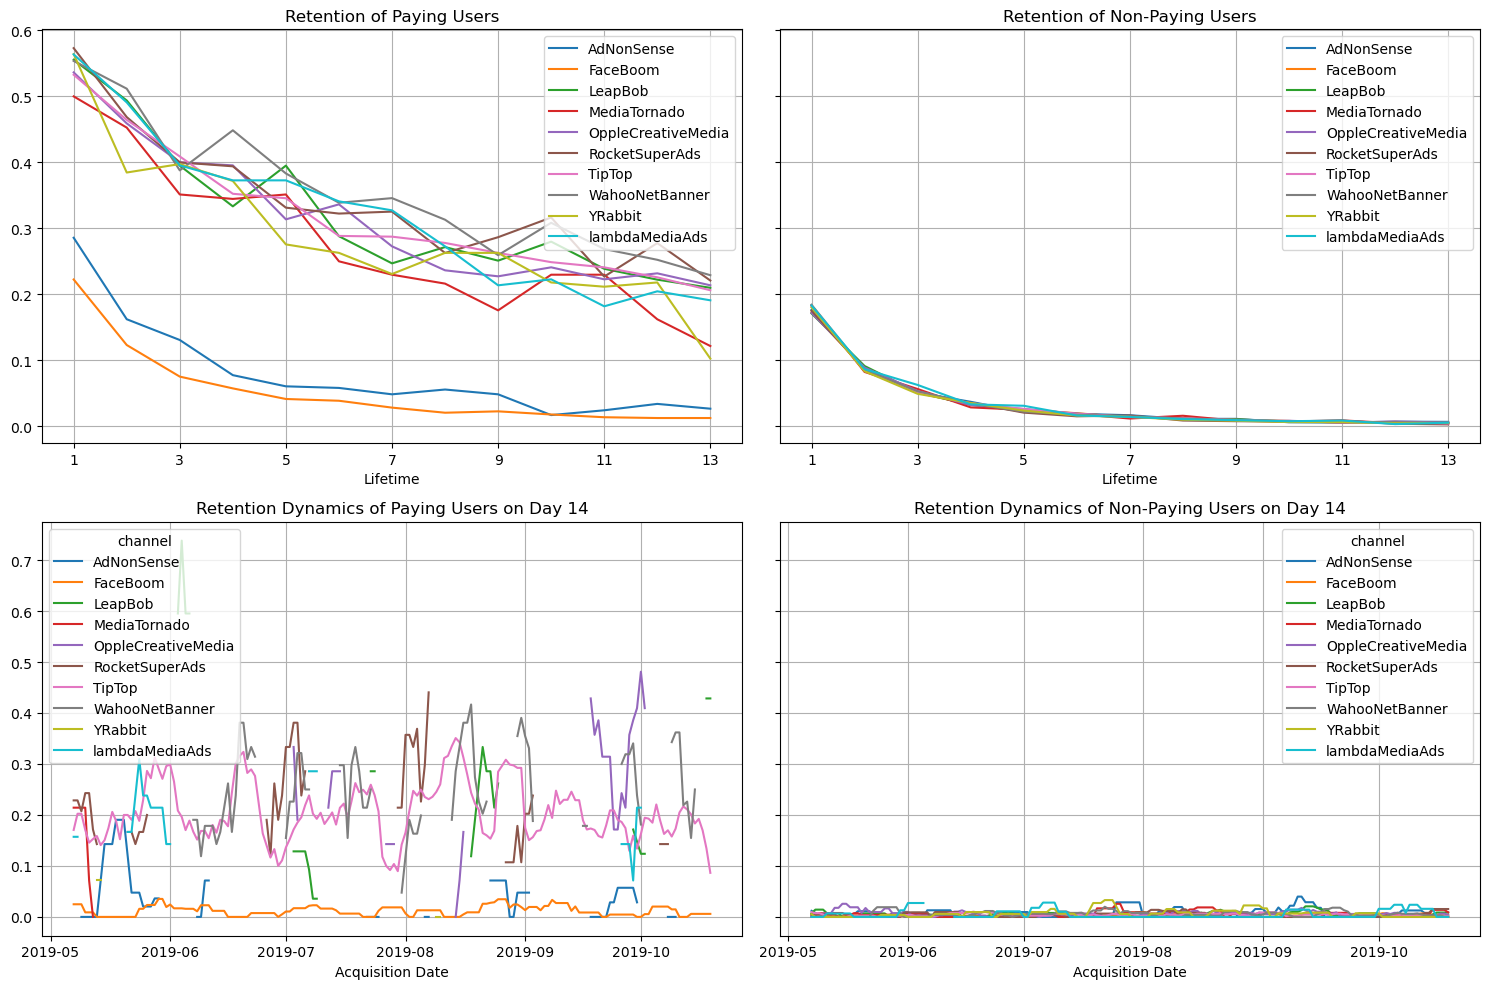

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organics, visits, observation_date, horizon_days, ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Retention by Region**:
- **Key Observations**:
  - The U.S. exhibits the lowest retention rates compared to European countries.
  - France, Germany, and the U.K. show similar trends, with higher retention throughout the user lifetime.

**Retention by Device Type**:
- **Key Observations**:
  - Users on Android and PC demonstrate better retention rates compared to iPhones and Macs users.
  - Android and PC users exhibit lower engagement and faster drop-off over time.

**Retention by Acquisition Channel**:
- **Key Observations**:
  - Channels like WahooNetBanner and RocketSuperAds exhibit relatively high retention for paying users but not so high compared to others.

### 6.3 Analyze User Conversion and its Dynamics

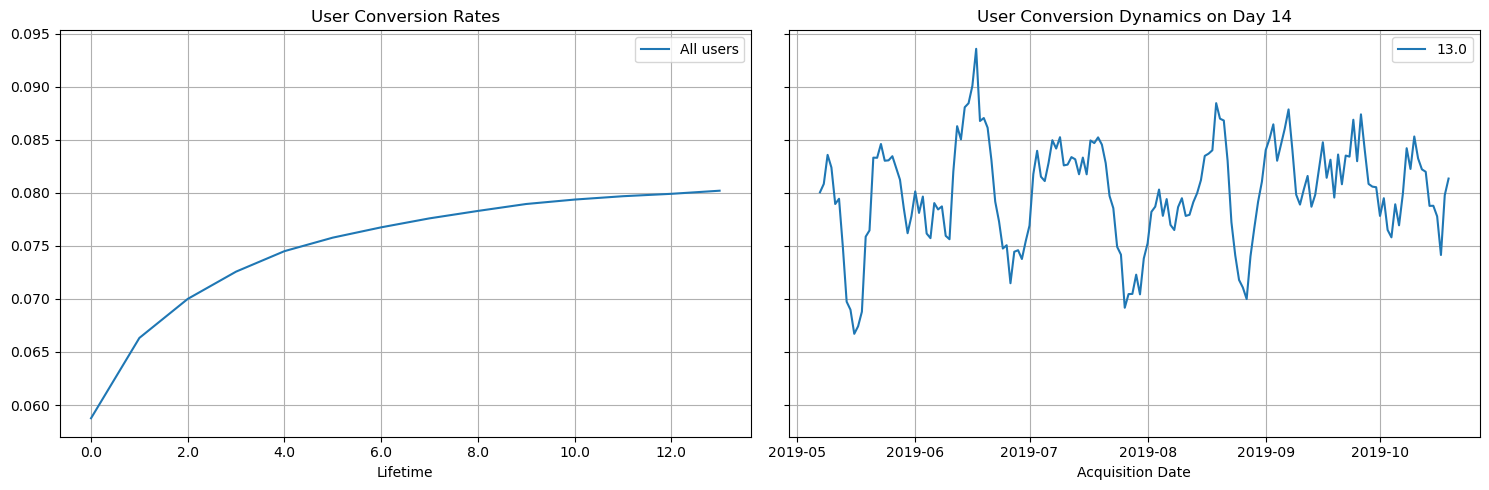

In [66]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organics, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

1. **Conversion Rates**:
   - User conversion rates increase gradually over their lifetime, as seen in the left graph.
   - This indicates that users take time to convert into paying customers.

2. **Conversion Dynamics**:
   - The right graph shows fluctuations in conversion rates on the 14th day.
   - These fluctuations might be attributed to seasonal trends or variations in acquisition strategies.

Let's conduct Additional Conversion Analysis Based on **Region**, **Device Type**, and **Acquisition Channel**:


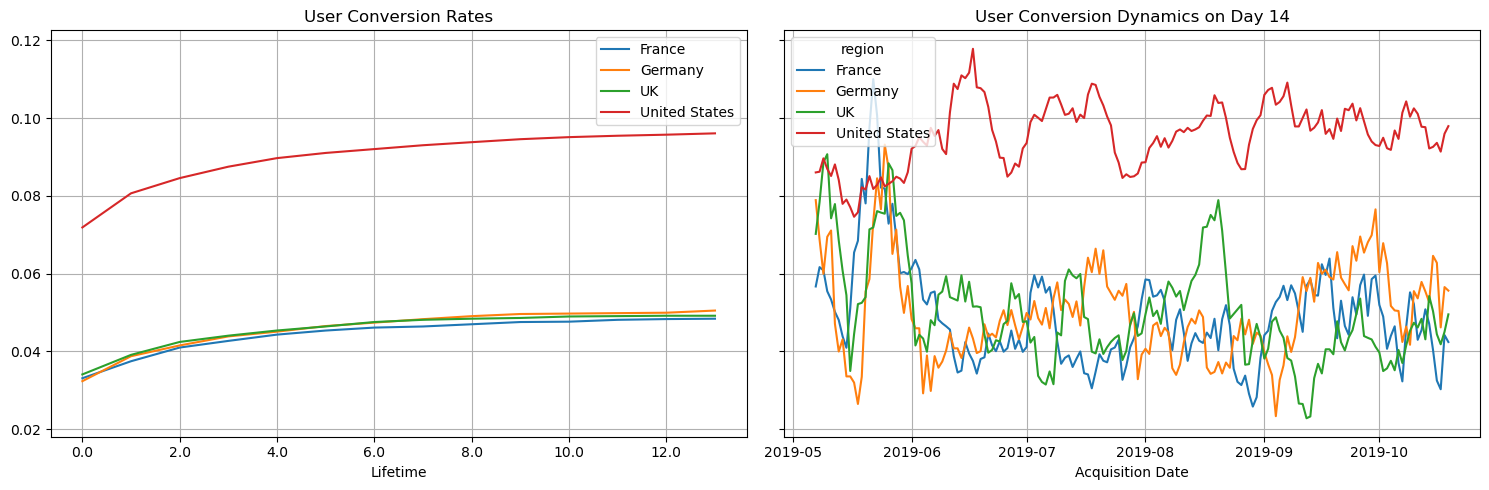

In [67]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organics, orders, observation_date, horizon_days, ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

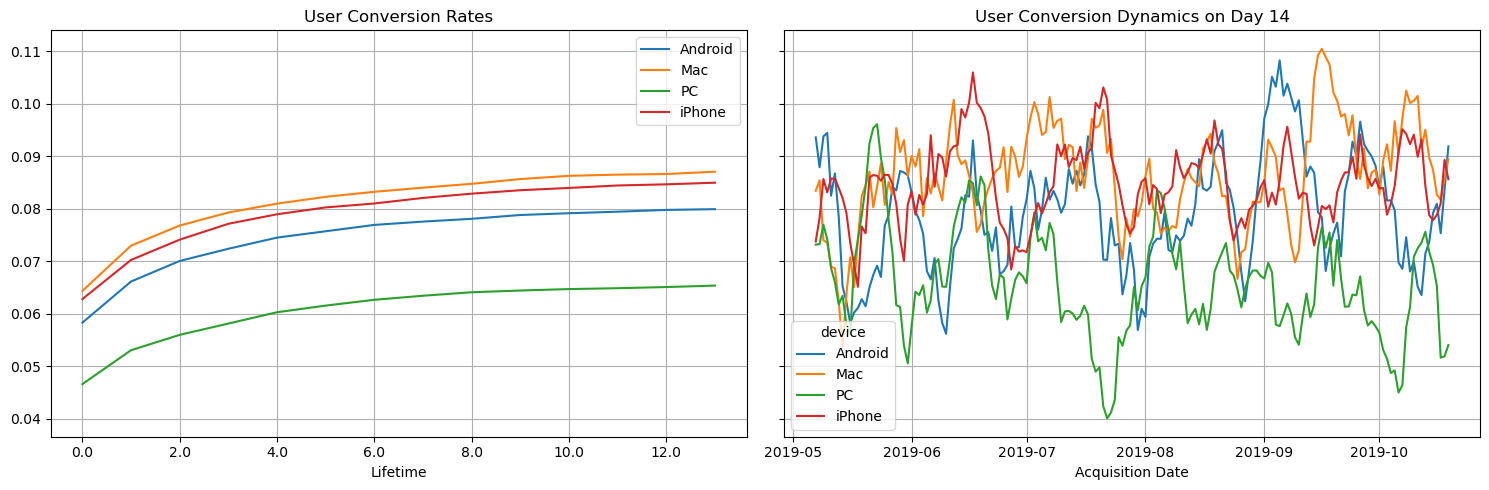

In [68]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organics, orders, observation_date, horizon_days, ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

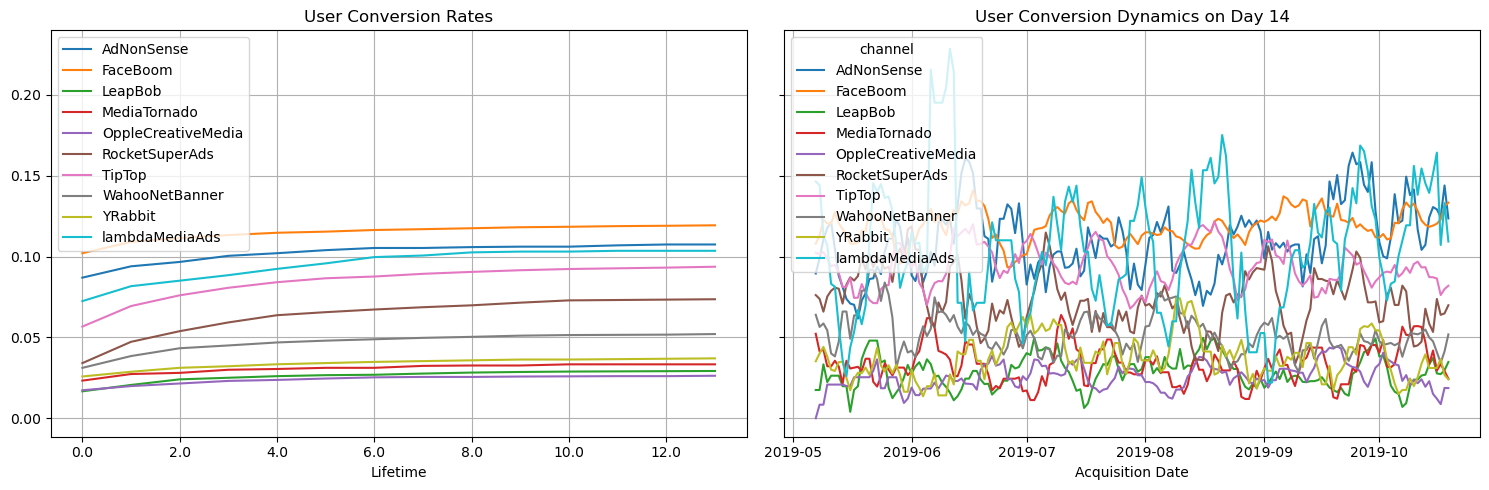

In [69]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organics, orders, observation_date, horizon_days, ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


**1. Region**:
- **Key Observations**:
  - The United States exhibits the highest overall conversion rates compared to other regions.
  - European countries like France, Germany, and the UK have similar conversion trends, with lower rates than the US.
  
**2. Device Type**:
- **Key Observations**:
  - Users on iPhones and Macs demonstrate higher conversion rates compared to Android and PC users.
  - PC users show the lowest conversion rates, with minimal growth over time.

**3. Acquisition Channel**:
- **Key Observations**:
  - Channels like FaceBoom and AdNonSense exhibit significantly higher conversion rates compared to others.

### 6.4 Analyze Advertising ROI by Device

Build LTV and ROI charts, as well as dynamic LTV, CAC, and ROI charts.

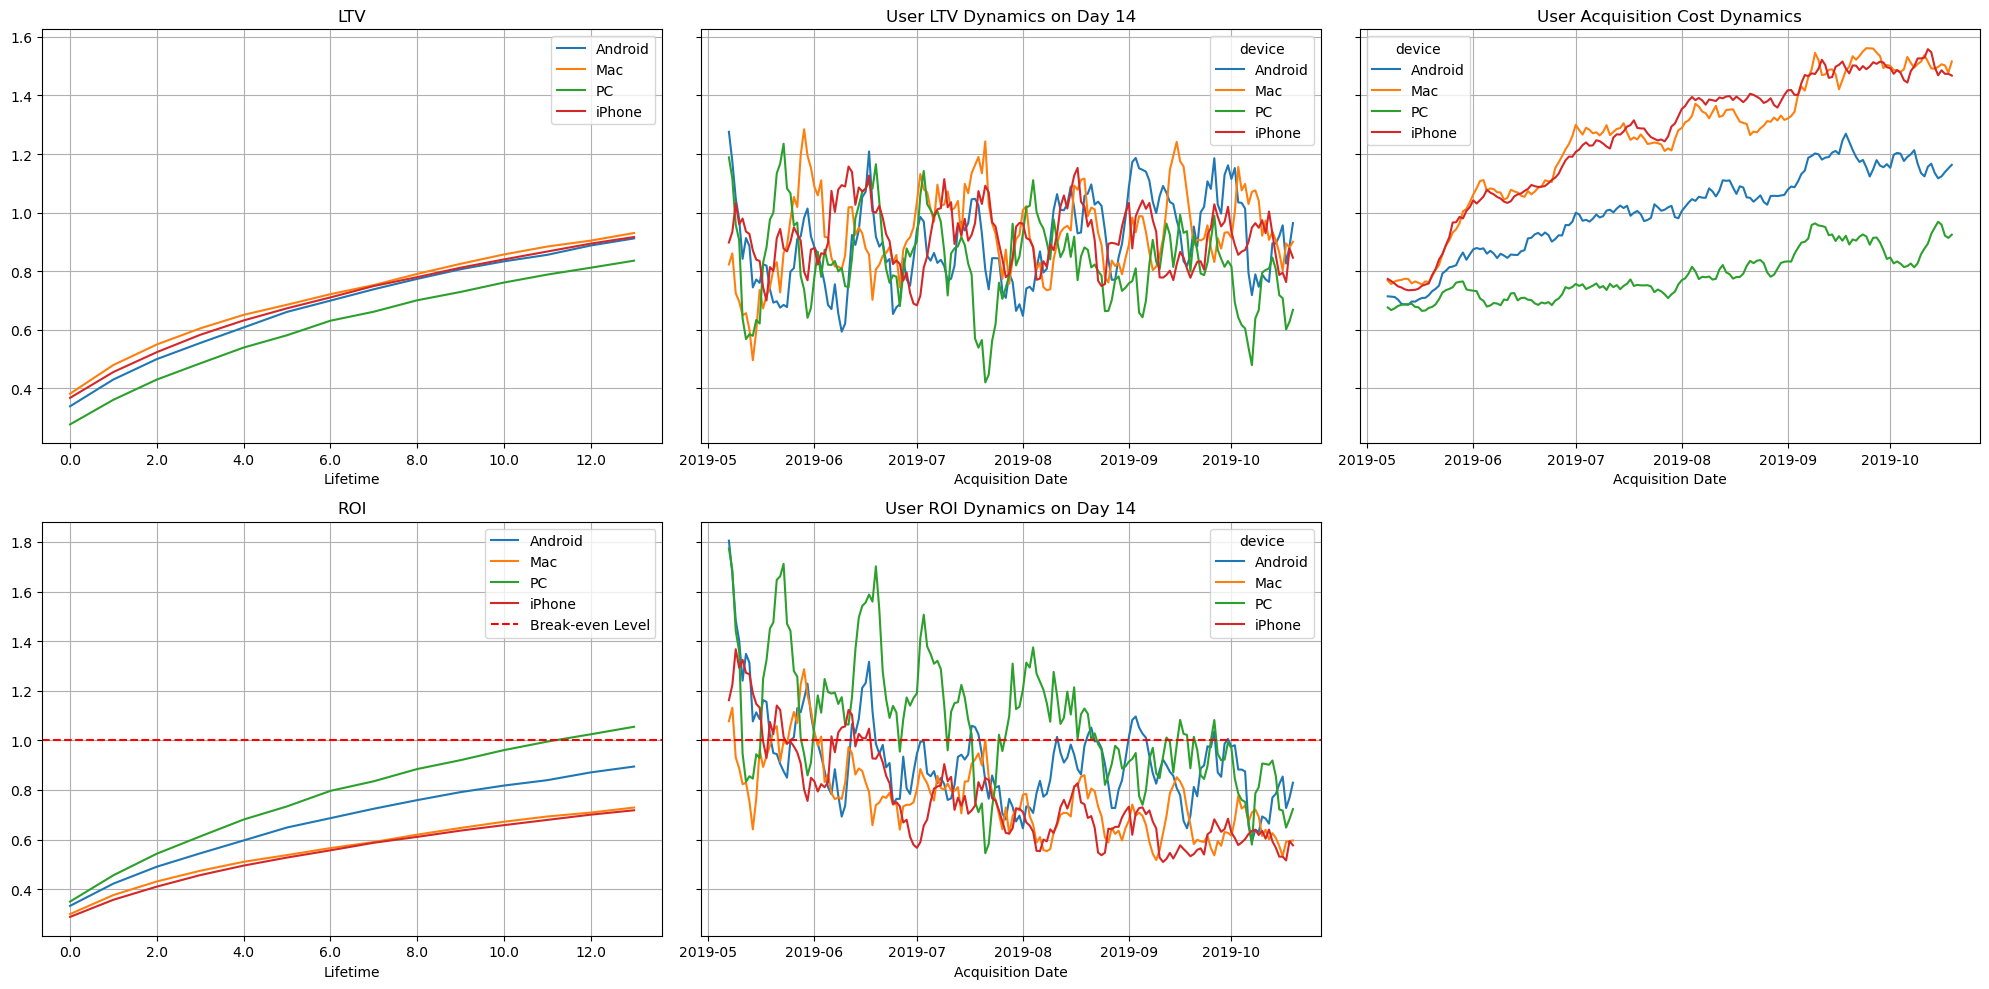

In [70]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles_without_organics, orders, observation_date, horizon_days, ['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- **High LTV for iPhone, Mac, and Android**: Users on iPhone, Mac, and Android generate higher LTV compared to PC users.
- **High Acquisition Costs for iPhone and Mac**: The cost of acquiring Apple device users is significantly higher, impacting ROI.
- **Low ROI for iPhone, Mac, and Android**: Despite high LTV, acquisition costs for iPhone, Mac, and Android users are not recouped, requiring a review of acquisition strategies for these devices.
- **Better ROI for PC**: PC users exhibit higher ROI, surpassing the breakeven point on the 12th day, making PC a more profitable segment for user acquisition.

### 6.5 Analyze Advertising ROI by Country

Build LTV and ROI charts, as well as dynamic LTV, CAC, and ROI charts.

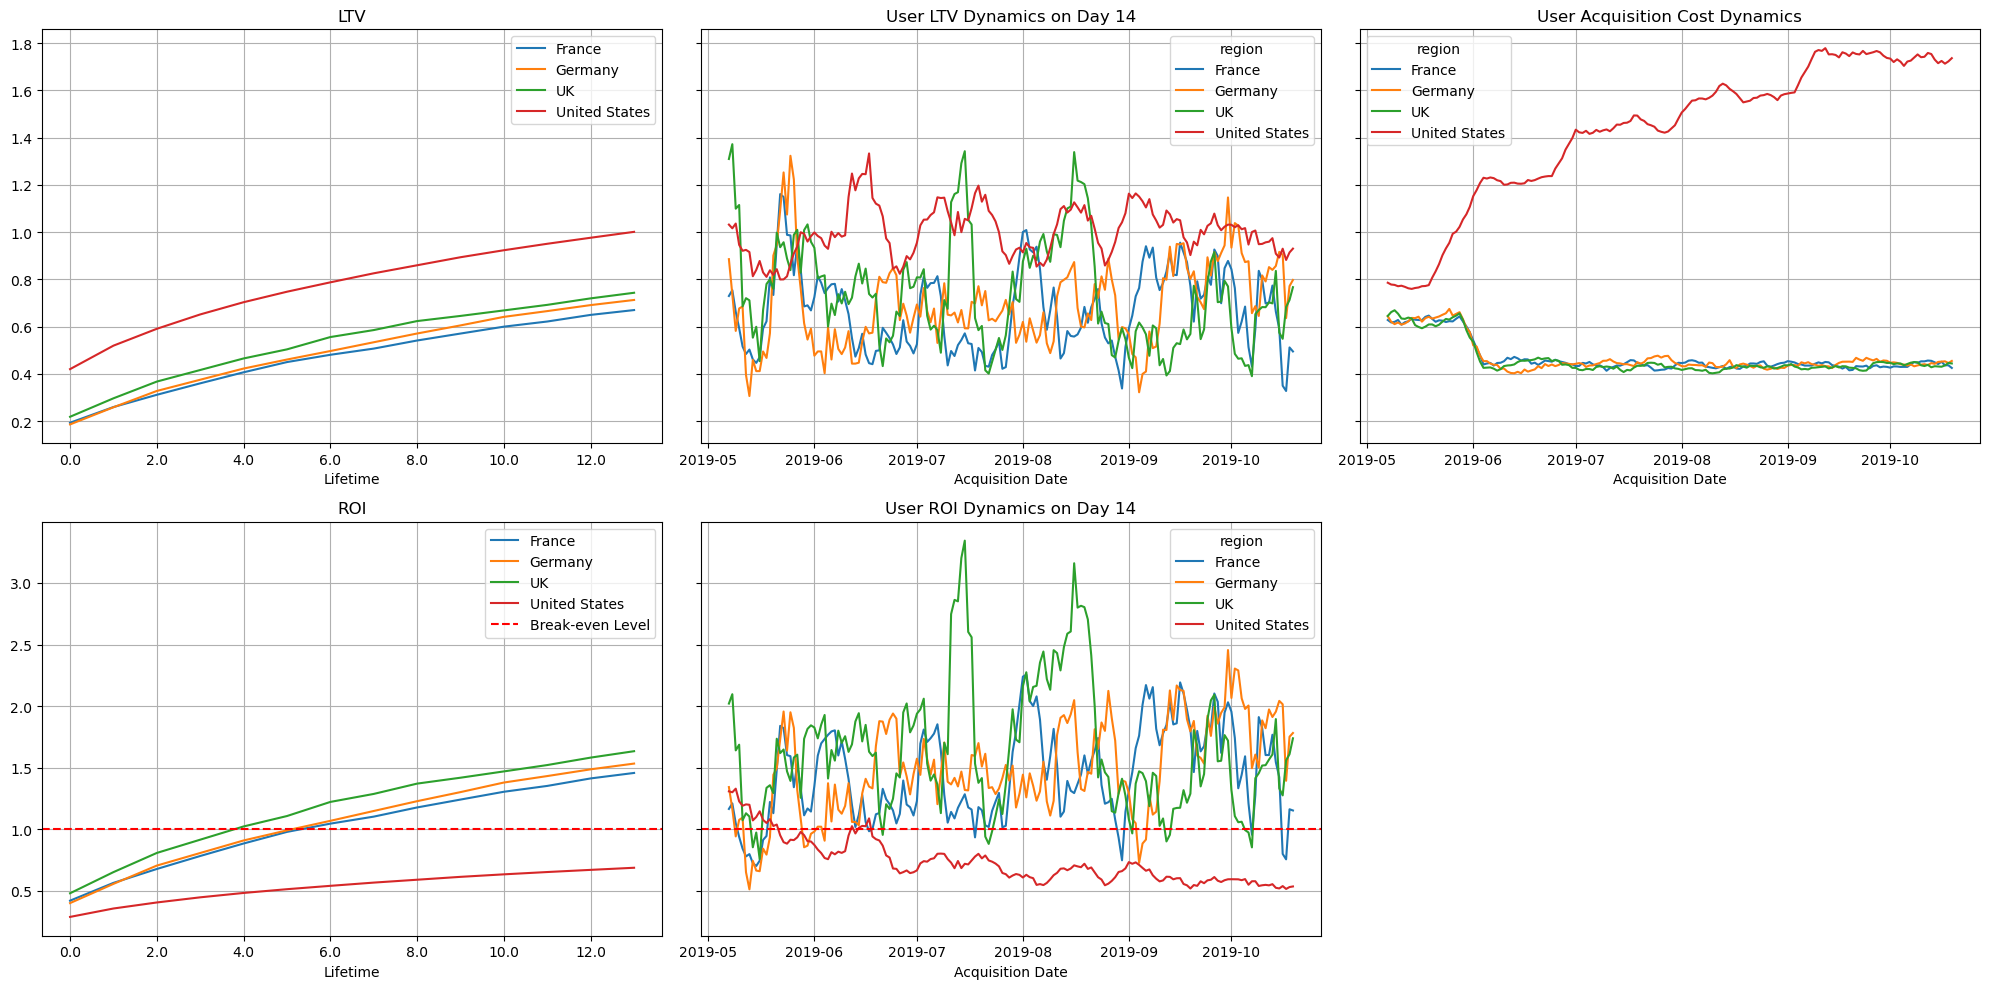

In [71]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles_without_organics, orders, observation_date, horizon_days, ['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


- **High LTV for the United States**: Users from the U.S. generate higher LTV compared to users from other regions.
- **High Acquisition Costs for the United States**: The cost of acquiring users from the U.S. is significantly higher, impacting ROI.
- **Low ROI for the United States**: Despite high LTV, acquisition costs for U.S. users are not recouped, requiring a review of acquisition strategies for this region.
- **Better ROI for Germany and the United Kingdom**: Users from these regions exhibit higher ROI, surpassing the breakeven point, making them priority targets for future acquisition. French users also achieve profitability in the long term.

### 6.6 Analyze Advertising ROI by Channel

Build LTV and ROI charts, as well as dynamic LTV, CAC, and ROI charts.

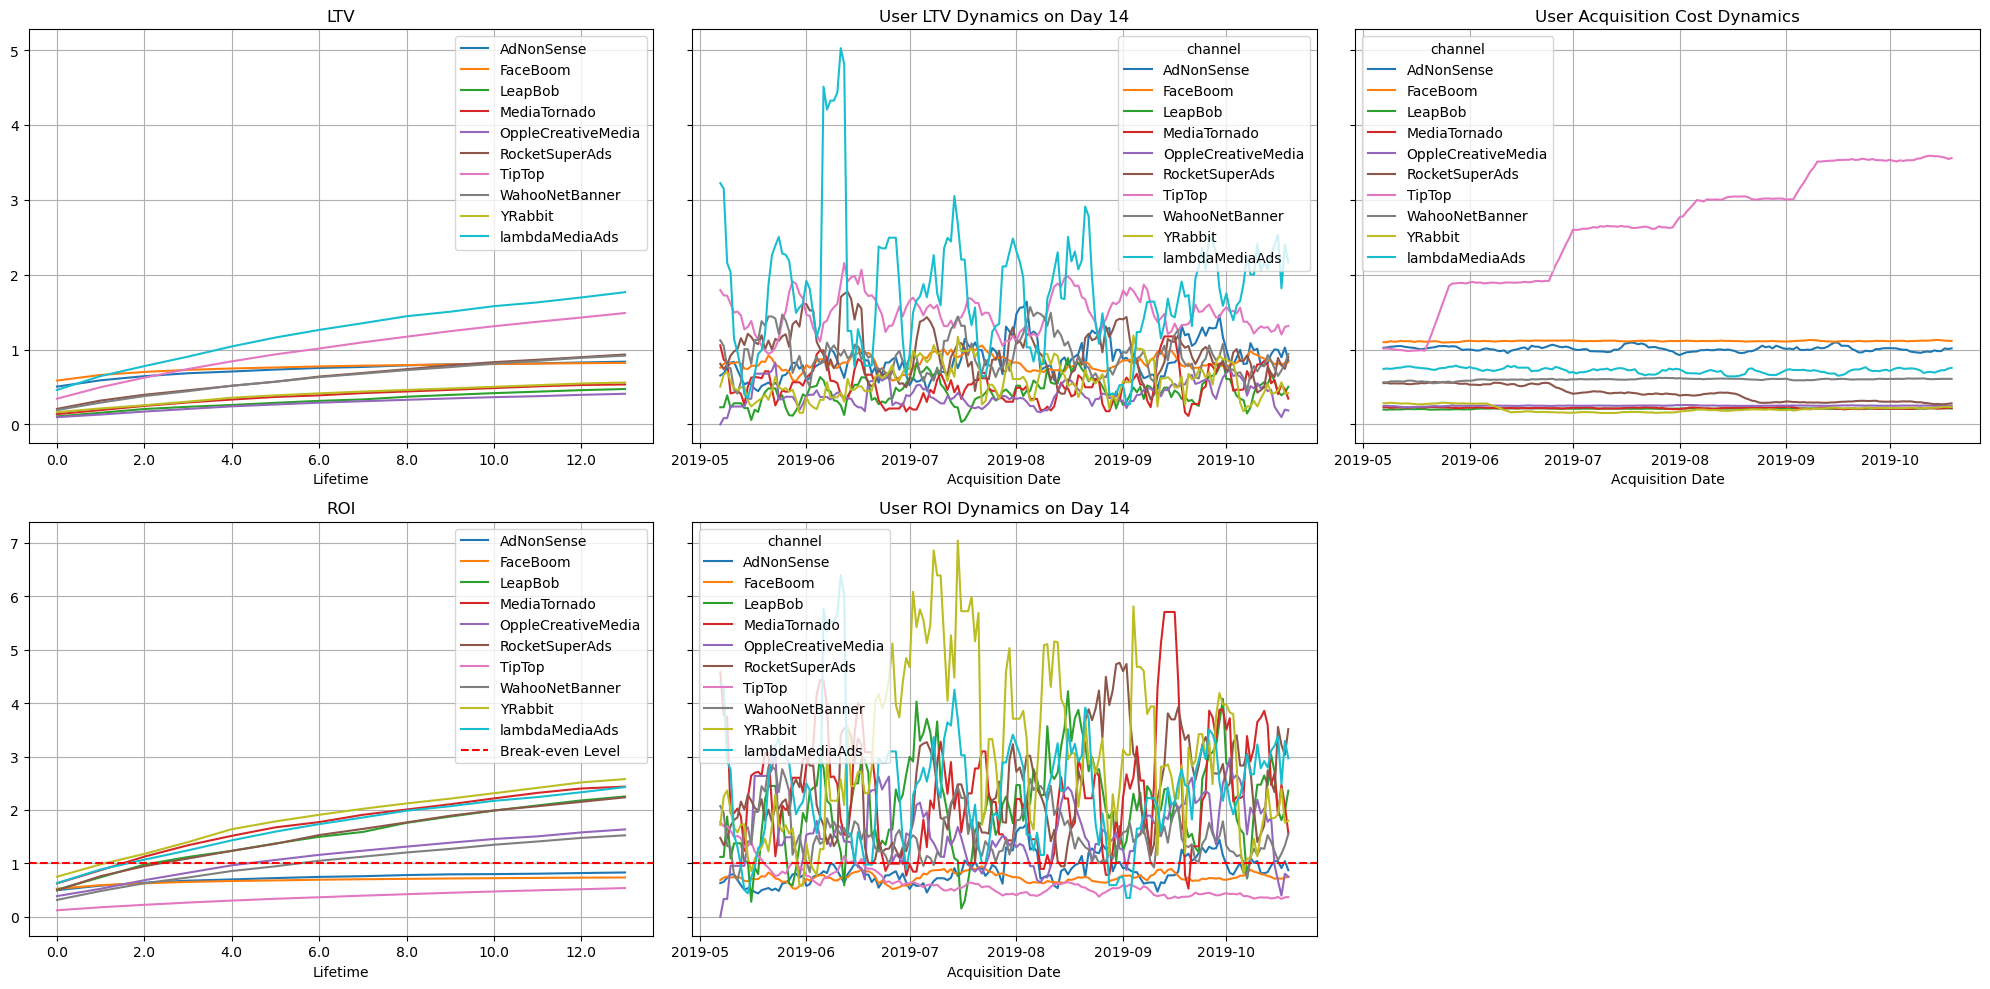

In [72]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles_without_organics, orders, observation_date, horizon_days, ['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- **High LTV for lambdaMediaAds and TipTop**: Users acquired through these channels generate the highest LTV.
- **High Acquisition Costs for TipTop**: The cost of acquiring users through TipTop is significantly higher, impacting ROI.
- **High ROI for YRabbit, MediaTornado, and lambdaMediaAds**: These channels demonstrate ROI well above the breakeven point, making them the most cost-effective and profitable channels.

**TipTop's Unprofitability**: It is evident that TipTop fails to achieve profitability due to a sharp increase in acquisition costs. The cost per acquisition rose significantly from 1 in May to 3.5 in October.

### 6.7 Answers on Key Questions

#### Does Advertising Overall Pay Off?

Based on the ROI analysis, advertising overall does not pay off at all. It is linked with the gradual increase in CAC durign the analysed period.

#### Which Devices, Countries, and Channels Negatively Impact Advertising Profitability?

- **Devices**: Users on iPhone, Mac, and Android show low ROI, indicating that the costs of acquiring users on these devices do not pay off.

- **Countries**: Users from the United States exhibit low ROI despite their high LTV.

- **Advertising Channels**: The TipTop channel demonstrates high acquisition costs and low ROI, indicating its negative impact on advertising profitability. Moreover, AdNionSense and FaceBoom are also considered to be unprofitable.

#### What Could Be Causing Profitability Issues?

- **High Customer Acquisition Costs (CAC)**: Certain devices and channels require significant spending to acquire users, which reduces overall ROI.

- **Low Conversion Rates**: Some regions and devices exhibit low user conversion rates, leading to lower LTV and, consequently, lower ROI.

- **Ineffective Advertising Campaigns**: Low ROI on specific channels may be due to ineffective campaigns that fail to attract high-quality users.


---

## 7. Summary


### Does Advertising Overall Pay Off?
Based on the ROI analysis:
- Advertising overall does not pay off, as ROI remains below the breakeven point (1.0) across many channels and devices.
- This is largely due to the gradual increase in CAC during the analyzed period, which outpaced revenue growth.

---

### Devices, Countries, and Channels Negatively Impacting Advertising Profitability

#### **Devices**:
- **iPhone, Mac, and Android**: 
  - Users on these devices demonstrate low ROI, as acquisition costs are significantly higher compared to revenue generated.
  - Despite high LTV, these devices fail to achieve profitability.

- **PC**: 
  - While PC users show the lowest acquisition costs and better ROI compared to other devices, their overall contribution remains limited due to a smaller user base.

#### **Countries**:
- **United States**:
  - Users in the U.S. generate the highest LTV but exhibit low ROI due to excessively high acquisition costs.
- **European Countries (France, Germany, UK)**:
  - France, Germany, and the UK show better ROI, surpassing the breakeven point.

#### **Channels**:
- **TipTop**:
  - High acquisition costs, rising from 1 in May to $3.5 in October, result in low ROI despite a high LTV.
- **FaceBoom and AdNonSense**:
  - Both channels demonstrate unprofitability due to high CAC and low ROI, indicating inefficient use of marketing budgets.

---

### Reasons for Inefficient User Acquisition

1. **High Customer Acquisition Costs (CAC)**:
   - Significant increases in CAC across certain channels (e.g., TipTop) directly impact profitability.
   - Devices like iPhones and Macs incur higher costs due to their premium target audience.

2. **Low Conversion Rates**:
   - Some regions (e.g., the U.S.) and devices (e.g., PC) exhibit low conversion rates, reducing LTV and ROI.

3. **Ineffective Advertising Campaigns**:
   - Channels like TipTop and FaceBoom show inefficient campaign performance, failing to attract high-quality users despite high spending.

4. **Retention Issues**:
   - Retention for non-paying users is extremely low, while even paying users experience significant drop-offs after the initial weeks.

5. **Seasonal and Traffic Quality Variations**:
   - Fluctuations in LTV and retention rates suggest seasonal trends and inconsistencies in traffic quality.

---

### Recommendations for the Marketing Department

#### **1. Optimize High-Cost Channels**
- Focus on reducing acquisition costs for **TipTop** and **FaceBoom** by:
  - Negotiating better ad placement rates.
  - Adjusting targeting strategies to focus on more cost-effective user segments.

#### **2. Reallocate Budget to Profitable Channels**
- Prioritize channels with high ROI, such as **YRabbit**, **MediaTornado**, and **lambdaMediaAds**.
- Increase spending on PC users who achieve breakeven faster.

#### **3. Improve Retention Strategies**
- Develop personalized campaigns for non-paying users to increase engagement and conversion.
- For paying users, introduce loyalty programs or tailored content to extend user lifetimes.

#### **4. Focus on High-ROI Regions**
- Concentrate marketing efforts on Germany, the UK, and France, which exhibit better ROI.
- Reassess strategies for the U.S. market to address high acquisition costs and improve conversion rates.

#### **5. Optimize Campaign Effectiveness**
- Use A/B testing to refine messaging and targeting for underperforming channels like TipTop and FaceBoom.
- Implement analytics tools to monitor user behavior and identify high-quality traffic sources.

#### **6. Monitor and Control CAC**
- Continuously track CAC dynamics to identify early warning signs of inefficiency.
- Avoid overspending on channels or devices with historically low ROI.

#### **7. Address Seasonal Fluctuations**
- Prepare flexible strategies to adapt to seasonal trends and maintain consistent traffic quality.

#### **8. Invest in Data-Driven Marketing**
- Utilize predictive analytics to forecast ROI for campaigns.
- Leverage data to create customized user acquisition strategies, reducing inefficiencies across devices, regions, and channels.

By implementing these recommendations, the marketing department can improve overall profitability, enhance ROI, and ensure a more effective allocation of resources across all campaigns.
